In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
data = pd.read_csv('classification.csv')
data.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [3]:
data.shape

(200, 2)

In [25]:
TP = data[(data['pred']==data['true'])&(data['pred']==1)].count()[0]
TP

43

In [26]:
FP = data[(data['pred']!=data['true'])&(data['pred']==1)].count()[0]
FP

34

In [28]:
FN = data[(data['pred']!=data['true'])&(data['pred']==0)].count()[0]
FN

59

In [29]:
TN = data[(data['pred']==data['true'])&(data['pred']==0)].count()[0]
TN

64

In [30]:
f = open('TP_FN.txt', 'w')
p = str(TP) + ' ' + str(FP) + ' ' +str(FN) + ' ' + str(TN)
f.write(str(p))
f.close()

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
ac = accuracy_score(data['true'], data['pred'])
pr = precision_score(data['true'], data['pred'])
re = recall_score(data['true'], data['pred'])
f1 = f1_score(data['true'], data['pred'])

In [36]:
f = open('ac_pr_re_f1.txt', 'w')
p = str(ac) + ' ' + str(pr) + ' ' +str(re) + ' ' + str(f1)
f.write(str(p))
f.close()

In [37]:
scores_data = pd.read_csv('scores.csv')
scores_data.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [41]:
from sklearn.metrics import roc_auc_score
auc_score_log = roc_auc_score(y_score=scores_data['score_logreg'], y_true=scores_data['true'])
auc_score_svm = roc_auc_score(y_score=scores_data['score_svm'], y_true=scores_data['true'])
auc_score_knn = roc_auc_score(y_score=scores_data['score_knn'], y_true=scores_data['true'])
auc_score_tree = roc_auc_score(y_score=scores_data['score_tree'], y_true=scores_data['true'])

In [43]:
print auc_score_log
print auc_score_svm
print auc_score_knn
print auc_score_tree

0.719187675070028
0.7086834733893557
0.6351540616246498
0.6919267707082833


In [71]:
f = open('score_logreg.txt', 'w')
f.write('score_logreg')
f.close()

Text(0.5,1,'PR-curve for LogReg')

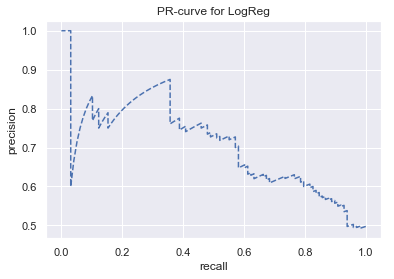

In [53]:
from sklearn.metrics import precision_recall_curve
precision_lg, recall_lg, thresholds_lg = precision_recall_curve(y_true=scores_data['true'], probas_pred=scores_data['score_logreg'])
plt.plot(recall_lg, precision_lg, '--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR-curve for LogReg')

Text(0.5,1,'PR-curve for SVM')

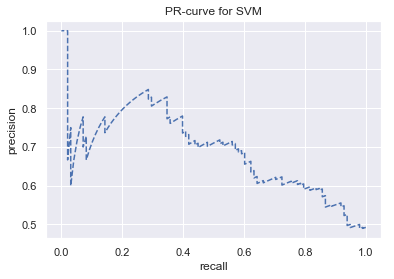

In [54]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=scores_data['true'], probas_pred=scores_data['score_svm'])
plt.plot(recall_svm, precision_svm, '--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR-curve for SVM')

Text(0.5,1,'PR-curve for KNN')

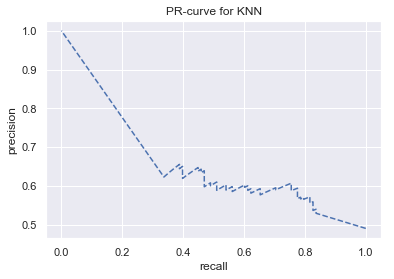

In [55]:
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=scores_data['true'], probas_pred=scores_data['score_knn'])
plt.plot(recall_knn, precision_knn, '--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR-curve for KNN')

Text(0.5,1,'PR-curve for TREE')

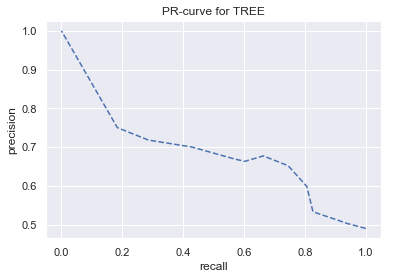

In [56]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_true=scores_data['true'], probas_pred=scores_data['score_tree'])
plt.plot(recall_tree, precision_tree, '--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR-curve for TREE')

In [68]:
lgreg = pd.DataFrame({'rec':recall_lg, 'prec':precision_lg})
svm = pd.DataFrame({'rec':recall_svm, 'prec':precision_svm})
knn = pd.DataFrame({'rec':recall_knn, 'prec':precision_knn})
tree = pd.DataFrame({'rec':recall_tree, 'prec':precision_tree})

In [69]:
lgreg_pr_max = lgreg[lgreg['rec']>=0.7]['prec'].max()
svm_pr_max = svm[svm['rec']>=0.7]['prec'].max()
knn_pr_max = knn[knn['rec']>=0.7]['prec'].max()
tree_pr_max = tree[tree['rec']>=0.7]['prec'].max()

In [70]:
print lgreg_pr_max
print svm_pr_max
print knn_pr_max
print tree_pr_max

0.6302521008403361
0.6228070175438597
0.6065573770491803
0.6517857142857143


In [75]:
f = open('tree_pr_max.txt', 'w')
f.write('score_tree')
f.close()